# SI 618: Data Manipulation and Analysis

# ----------CRLT Mid-point Review----------

First of all, thank you very much to all of you who shared feedback! Here is a quick summary from the report and the things we plan to do to react to it:

* Strengths
   * You identified the course content, the examples and demosntrations in labs/homeworks, and the help you recevied through Slack/office hours as the strengths
     * Those of you not taking advantage of Slack and office hours: please do so. Your classmates that do find them useful.
* Ways to Improve
  * Three students mentioned that font size was an issue. I will zoom in more 
  * Some students identified the pace of the class and assignments as a challenge. We have a few more breaks from now on (e.g., not every week has a homework/lab)
  * There were requests for more hints for homeworks/labs. We will drop more hints on Slack for the homeworks and labs. We also realize that sometimes there are small bugs that get revealed as you work on the assignments. The students that identify the problem on Slack will be given a small bonus. Why are we doing this?
    * Students who participate in Slack and office hours identify those as useful. I want more of you to take advantage of these and participate more on Slack and show up to office hours.
    
* Quantitative Data
   * 28 people agreed that they are getting the right support while 3 disagreed. Quote from the report: "One of those students asked if the lecture slides font size could be increased, while another seems to be struggling to understand the homework. The third student who disagreed did not offer any suggestions for how to be better supported."
   * If there are other ways I can help you, please let me know.

# ----------Project I Reports and Presentations coming up----------

Here is what the rest of the semester looks like. For you to get a sense for the types of analyses you will be able to run.

<img src="resources/remaining_weeks.png" alt="Drawing" style="height: 300px;"/>

* Note: For Project 2, You can use the data you used for Project 1. You can also use some other dataset, no requirement to use two this time.

# ----------Univariate Statistics----------

# So, you want to explore your data...
* How can we describe it?
* What does it look like?
* Many questions about your data can be answered using plotting. Let's get into it!

# Plotting
* Introducing [Seaborn](http://seaborn.pydata.org/)
> Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Here are [some examples](http://seaborn.pydata.org/examples/index.html)!

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


# Why plots things? 
## Subquestion: Why plot the relationship between two variables, X and Y?

Think about the following relationship...

<img src="resources/AnscombeData.png" alt="Drawing" style="width: 600px;"/>
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# This fits a nice linear relationship
<img src="resources/AnscombeQ1.png" alt="Drawing" style="width: 200px;"/>
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

## So are we done?

# Ummm, no! Here are other data  that fit the same statistics
<img src="resources/AnscombePlot.png" alt="Drawing" style="width: 450px;"/>
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

## Now that we see Anscombe dataset, can you list some reasons as to why we might want to plot things? 


## Purpose of EDA (broadly)
* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models and
* determine optimal factor settings

# Spherical cows
The phrase comes from a joke that spoofs the simplifying assumptions that are sometimes used in theoretical physics.

>Milk production at a dairy farm was low, so the farmer wrote to the local university, asking for help from academia. A multidisciplinary team of professors was assembled, headed by a theoretical physicist, and two weeks of intensive on-site investigation took place. The scholars then returned to the university, notebooks crammed with data, where the task of writing the report was left to the team leader. Shortly thereafter the physicist returned to the farm, saying to the farmer, "I have the solution, but it works only in the case of spherical cows in a vacuum". [Wikipedia](https://en.wikipedia.org/wiki/Spherical_cow)

<img src="resources/Spot_the_cow.gif" alt="Drawing" style="width:200px;"/>




# Now, let's make some spherical cats...
<img src="resources/cat2.jpg" alt="Drawing" style="width: 300px;"/>

### How to model/create cats?
1. Decide what measure(s) to represent: Let's focus on weight here.
2. Decide what type of distribution to draw from: Like many natural phenomenon, the weight of adult domestic cats are normally distributed.
3. Choose parameters: This is mean and standard deviation for normal distribution. The average weight of a cat is 5000 grams (~10 lbs). Let's use random.standard_normal from numpy (https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) to create a standard normal distribution, scale it and add 5000 to make the mean the average cat weight.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
# The weights of a group of 80 cats (probably owned by )
measures = (np.random.standard_normal(80)*400+5000).astype(int)
measures

array([5023, 5086, 4764, 5066, 5453, 5841, 4912, 4944, 4619, 5217, 4104,
       4223, 4357, 4763, 4841, 5302, 4758, 4777, 4831, 5456, 4773, 4733,
       6062, 6119, 4691, 6142, 5132, 5552, 4792, 4743, 4566, 4439, 5371,
       5045, 5221, 5090, 4391, 4534, 4365, 4666, 4748, 4966, 5006, 4532,
       5231, 5054, 5090, 4293, 5487, 5169, 4483, 4820, 4912, 5582, 4950,
       4422, 4510, 5013, 5417, 5275, 5638, 4908, 5494, 4830, 4470, 5010,
       4814, 4900, 5285, 4449, 5119, 4941, 4988, 5003, 4660, 4747, 5351,
       5628, 5357, 4457])

## Measures of central tendency
* Mean
* Median 
* Mode

## Mean

Add up all the values and divide by the number of values:

$$mean = \frac {\sum{x_i}} {n}$$


In [3]:
sum(measures)/len(measures)

4972.1625

In [4]:
np.mean(measures) # find the mean

4972.1625

## Median

sort all the numbers and find the one in the middle

In [5]:
measures = np.sort(measures)
measures

array([4104, 4223, 4293, 4357, 4365, 4391, 4422, 4439, 4449, 4457, 4470,
       4483, 4510, 4532, 4534, 4566, 4619, 4660, 4666, 4691, 4733, 4743,
       4747, 4748, 4758, 4763, 4764, 4773, 4777, 4792, 4814, 4820, 4830,
       4831, 4841, 4900, 4908, 4912, 4912, 4941, 4944, 4950, 4966, 4988,
       5003, 5006, 5010, 5013, 5023, 5045, 5054, 5066, 5086, 5090, 5090,
       5119, 5132, 5169, 5217, 5221, 5231, 5275, 5285, 5302, 5351, 5357,
       5371, 5417, 5453, 5456, 5487, 5494, 5552, 5582, 5628, 5638, 5841,
       6062, 6119, 6142])

In [6]:
measures[len(measures)//2]  # find middle value

4944

In [7]:
np.median(measures)

4942.5

Why would those two be different?

## Another alternative: Mode

* mode = most common value
* Unfortunately not in default numpy

In [8]:
from scipy import stats
stats.mode(measures)

/var/folders/10/lx3rh6q956qc768glw5ktj600000gn/T/ipykernel_28169/1942535744.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(measures)


ModeResult(mode=array([4912]), count=array([2]))

## Outliers

Now, to demonstrate what happens to mean, median and mode when we add an outlier, we will append some crazy big value to the end of our measures.  But let's not mess up our measures array, so let's copy it first

In [9]:
outliers = 500000 # change np.nan to some extreme value

measures2 = measures.copy()
measures2 = np.append(measures2,outliers)
measures2Mean = np.mean(measures).round(2)
measures2Median = np.median(measures)
measures2Mode = stats.mode(measures)[0].item()

print(measures2Mean, measures2Median, measures2Mode)

4972.16 4942.5 4912


/var/folders/10/lx3rh6q956qc768glw5ktj600000gn/T/ipykernel_28169/963765400.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  measures2Mode = stats.mode(measures)[0].item()


What happened to each of the mean, median and mode when we added that value?
<img src="resources/cat.jpg" alt="Drawing" style="width: 300px;"/>

## Measures of dispersion

* Percentile cutoffs
 * Interpercentile range
* Variance
* Standard Deviation

## Percentiles

* In a *sorted* list, find the threshold so that data is split
 * 5th percentile -- bottom 5% of measures below threshold
 * 25th percentile -- bottom 25% of measures below
 * 97th percentile -- bottom 97% of mesures below

## Numpy does this well

`np.percentile(array,percentile,
               interpolation='linear')`

* linear: i + (j - i) * fraction, where fraction is the fractional part of the index surrounded by i and j.
* lower: i.
* higher: j.
* nearest: i or j, whichever is nearest.
* midpoint: (i + j) / 2.


In [10]:
np.percentile(measures,25) # the 25th percentile

4722.5

In [11]:
np.percentile(measures,25,method='higher') # bump it up to the next higher real value from the data

4733

## Interpercentile Range

* Sometimes we want to some range
 * e.g., 5th -- 95th percentile: 90% of measures sit here

In [12]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))

4364.6 - 5648.15


## Variance

How does the data spread around the mean?

$$ variance = \frac{\sum{(x_i - \mu)^2}}{n}$$

where, $\mu$ is the mean

$$ mu = \frac{\sum{x_i}}{n}$$

## Standard Deviation

* Measure of dispersion 

<img src="resources/Standard_deviation_diagram.svg.png" alt="Drawing" style="width: 400px;"/>

In [13]:
print(np.percentile(measures,2.5),"-",np.percentile(measures,97.5))
print(np.var(measures))
print(np.std(measures))  # this should be the square root of variance

4291.25 - 6063.424999999999
183972.56109375
428.9202269580557


# Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 
 
 and don't forget to inline matplotlib (that's a jupyter thing):

 ```
 %matplotlib inline
 ```

[seaborn.pydata.org](http://seaborn.pydata.org)

In [14]:
import seaborn as sns

## Strip Plot

<AxesSubplot:>

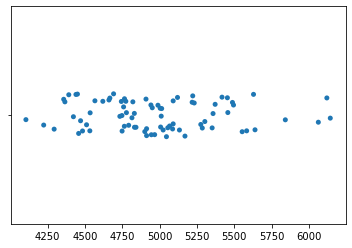

In [15]:
%matplotlib inline
import seaborn as sns
sns.stripplot(x=measures)

## Violin Plot
* Strip plots are useful for small data but if we have too much data...

<AxesSubplot:>

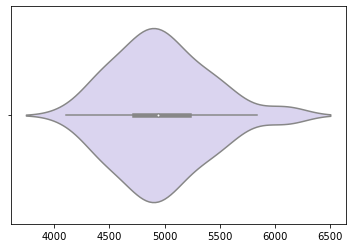

In [16]:
sns.violinplot(x=measures,color="#d7d0f3")

## Box Plot

<AxesSubplot:>

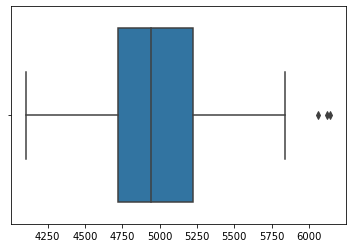

In [17]:
sns.boxplot(x=measures) 

And we can combine different methods

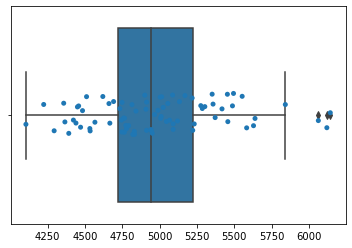

In [18]:
ax = sns.boxplot(x=measures)
ax = sns.stripplot(x=measures)

Hmm that doesnt looks right (hard to see the data points). Let's change the color. How do we do that? Check out the API.

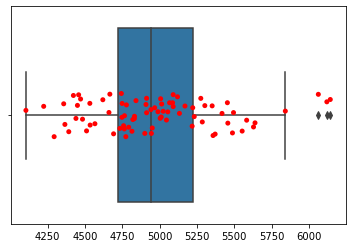

In [19]:
ax = sns.boxplot(x=measures)
ax = sns.stripplot(x=measures,color="red")

And we can manipulate the underlying plot to control different features.  See 
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python#34162641
and
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots for explanations about ```plt.subplots()```



<AxesSubplot:>

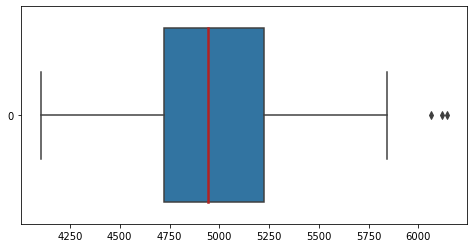

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
medianprops = dict( linewidth=2.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=measures,orient='h')

## Histogram

Stripplots (or scatter plots) can be misleading as it is hard to get a good idea about the distribution. You can create a histogram to do that

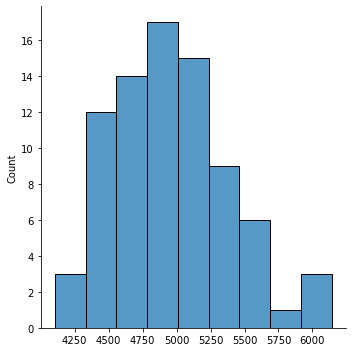

In [21]:
# x axis = value, y axis = count (frequency)
sns.displot(measures)

You can also produce a smoothing curve based on a kernel density estimate. (by default, this is not created)

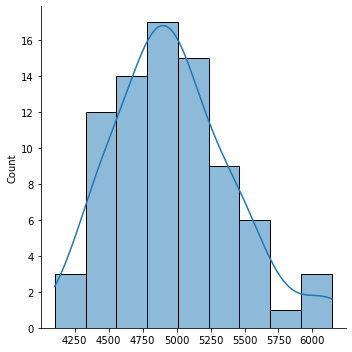

In [22]:
sns.displot(measures, kde=True) 

You can see that the data are presented in discretized buckets. What if you wanted to also see the underlying data?

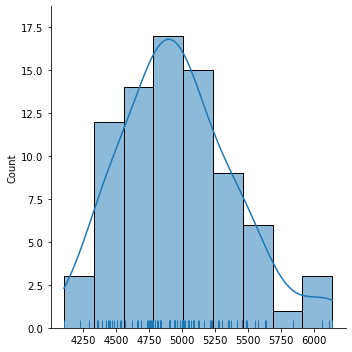

In [23]:
sns.displot(measures, rug=True, kde=True); # show a strip plot on bottom -- we call it a "rug"

## How is your data distributed?

Why do we care? Because distributions can tell us about the nature of generation process of data. Most people know about normal distributions. But...
* Many other kinds of distributions
* We can tell what they are by looking at distribution

## Uniform

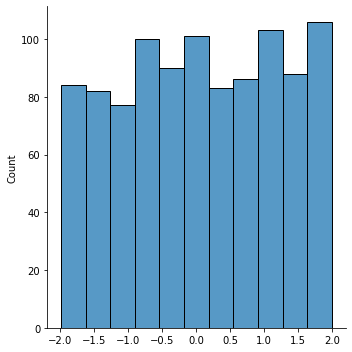

In [24]:
uniform = np.random.uniform(-2,2,1000)  # low,high,count
sns.displot(uniform)

## Bimodal

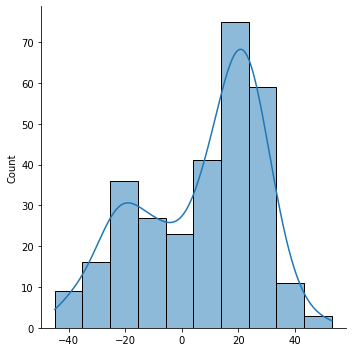

In [25]:
bimodal = np.append(np.random.normal(-20,10,100),
                    np.random.normal(20,10,200))
sns.displot(bimodal, kde = True)

/var/folders/10/lx3rh6q956qc768glw5ktj600000gn/T/ipykernel_28169/2157300335.py:1: RuntimeWarning: invalid value encountered in log
  sns.displot(np.log(bimodal), kde = True)


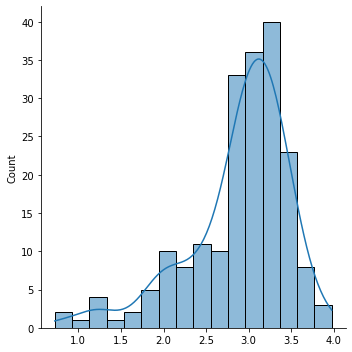

In [30]:
sns.displot(np.log(bimodal), kde = True)

# Poisson

$$ P(k~events~in~interval) = \frac{\lambda^ke^{-\lambda}}{k!} $$

$\lambda$ is the event rate

Examples
* Meteor strikes
* Arrival of patients to hospital

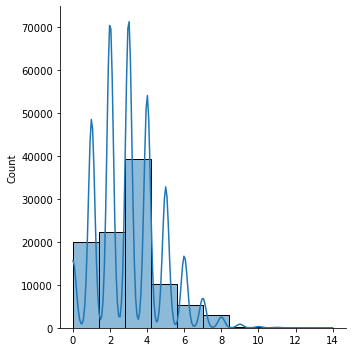

In [27]:
# as lambda goes up --> looks more normal
pois = np.random.poisson(3,100000) # lambda, count 
sns.displot(pois,bins=10, kde = True)

# Power/Zipf/Pareto

$$ P = \frac{x^{-a}}{\zeta(a)}$$

"long tail"
* degree distribution
* movie/music popularity
* words

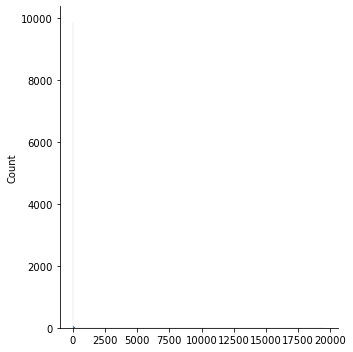

In [28]:
power = np.random.zipf(2,10000)
sns.displot(power,bins=400)

## Note:  Such skewed data (zipf, power -law) are better inspected in log-log scale

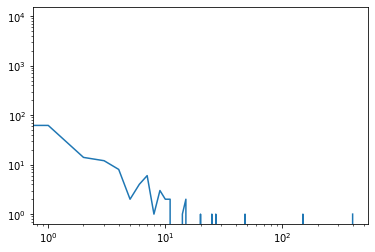

In [29]:
# bit of a hack (seaborn)
power = np.random.zipf(2,10000)
ax = plt.plot(np.histogram(power,bins=400)[0])
ax[0].axes.set_xscale("log")
ax[0].axes.set_yscale("log")

## Visual Tests on Data

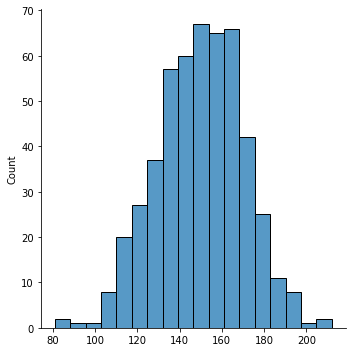

In [36]:
testdata = (np.random.standard_normal(500)*20+150).astype(int)
sns.displot(testdata)

## Run Sequence
* Run Sequence (index versus value)
* flat and non-drifting
 * fixed-location assumption holds
* vertical spread same over the entire plot, 
 * then the fixed-variation assumption holds.

Text(0.5, 0, 'index')

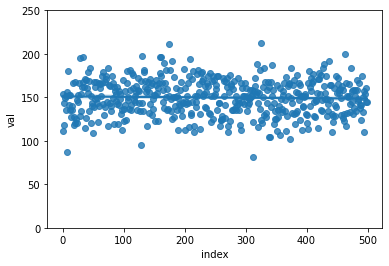

In [37]:
ax = sns.regplot(x=np.arange(len(testdata)),y=testdata)
ax.set_ylim(0,250)
ax.set_ylabel("val")
ax.set_xlabel("index")

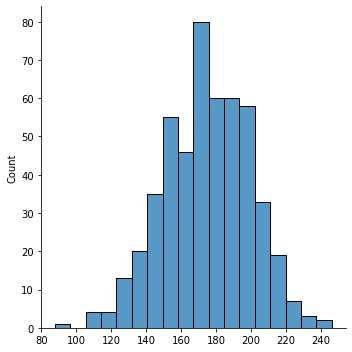

In [38]:
drifting = np.array([testdata[i]+i*(.1) for i in np.arange(len(testdata))])
sns.displot(drifting)

Text(0.5, 0, 'i')

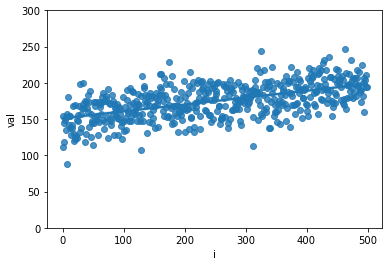

In [39]:
ax = sns.regplot(x=np.arange(len(drifting)),y=drifting)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

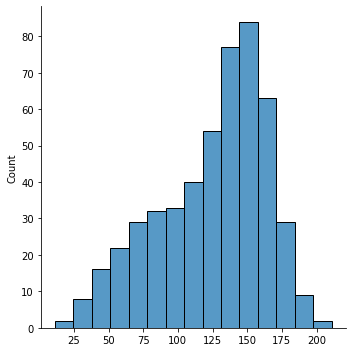

In [41]:
expanding = np.array([(testdata[i]+i*np.random.randint(-1,1)*.2)
                     for i in np.arange(len(testdata))])
sns.displot(expanding)

Text(0.5, 0, 'i')

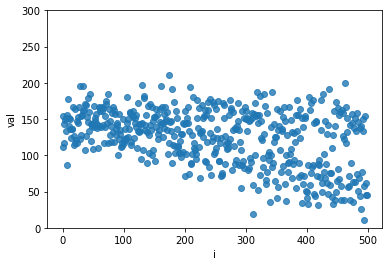

In [42]:
ax = sns.regplot(x=np.arange(len(expanding)),y=expanding,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

# Lag Plot

* Plot point $y_i$ versus $y_{i-1}$
* If the lag plot is structureless
 * randomness assumption holds.

Text(0.5, 0, 'y_i')

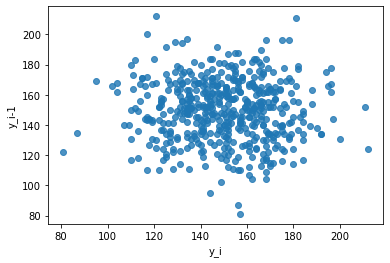

In [43]:
lag = testdata.copy()
lag = np.array(lag[:-1])
current = testdata[1:]
ax = sns.regplot(x=current,y=lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

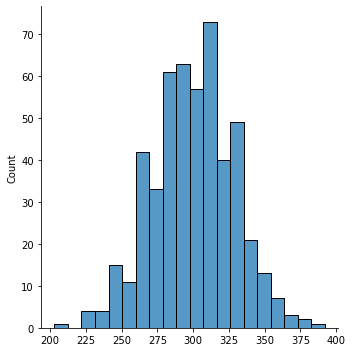

In [44]:
connected = np.array([testdata[i]+testdata[i-1] for i in np.arange(500)])
sns.displot(connected)

Text(0.5, 0, 'y_i')

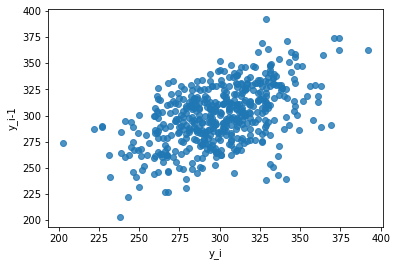

In [45]:
lag = connected.copy()
lag = np.array(lag[:-1])
current = connected[1:]
ax = sns.regplot(x=current,y=lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## QQ Plot
* QQ Plots takes our n ordered data points
 * sorted from smallest to largest
* Asks:
 * What is the relationship between quantiles from our data and quantiles from a theoretical distribution that we're assuming the sample is drawn from

<AxesSubplot:>

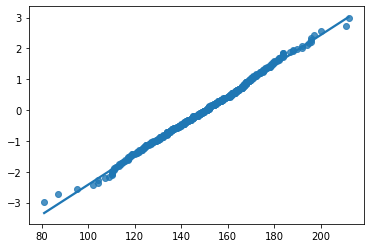

In [47]:
qntls, xr = stats.probplot(testdata, fit=False)
sns.regplot(x=xr,y=qntls)

What if your data was skewed? ( I will use skewnnorm described here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html)

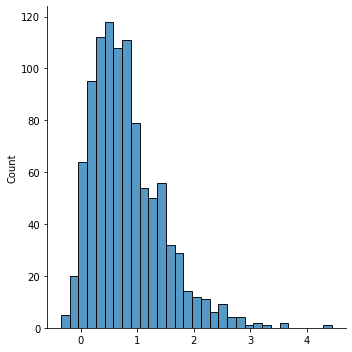

In [48]:
from scipy.stats import skewnorm
rightskewed = skewnorm.rvs(8, size=1000)
sns.displot(rightskewed)

<AxesSubplot:>

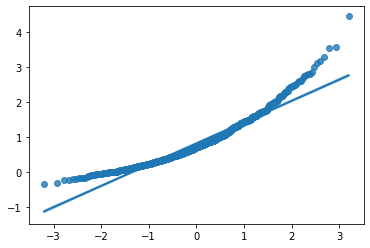

In [49]:
qntls, xr = stats.probplot(rightskewed, fit=False)
sns.regplot(x=qntls, y=xr)

### Let's check our understanding
Check out: https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html#right-skewed-data
What does that shape look like? Doesn't seem to match what we have. What is going on here?

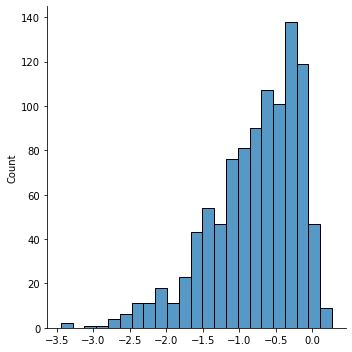

In [50]:
leftskewed = skewnorm.rvs(-8, size=1000)
sns.displot(leftskewed,kde=False)

<AxesSubplot:>

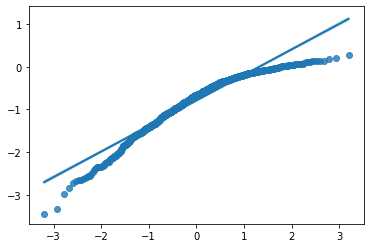

In [51]:
qntls, xr = stats.probplot(leftskewed, fit=False)
sns.regplot(x=qntls, y=xr)

### On your own time after class
1. Remember the expanding and drifting datasets? Create qq-plots for those
2. Try out plotting some other distributions. Example: Height? Weight? All adults? Male? 

In short, practice, practice, practice :) 

# Univariate Data -- Summary
* Simple but valuable
* We want to know how data is distributed
* How does it fit known models/distributions
* When does it not?
 * Visual and analytical tests
* Now it is time to move on from univariate data...

# Multi-variate Data

We will use the iris dataset included in seaborn package
![](resources/iris.png)

In [52]:
import seaborn as sns
import pandas as pd

In [53]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Remember our distplots:


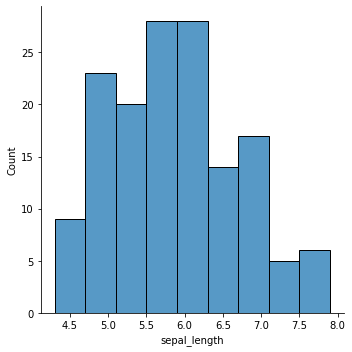

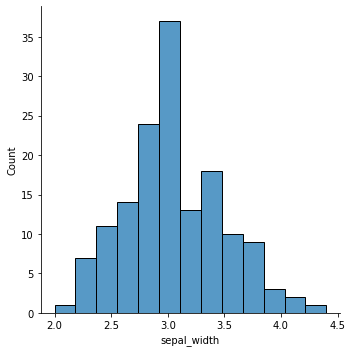

In [54]:
# Relationship between sepal length and width
sns.displot(df.sepal_length)
sns.displot(df.sepal_width)

## To-do when going through this notebook yourself: 
Create similar plots for the other three numeric variables in the dataset. In a couple of sentences, describe each of the plots. 

In [ ]:
#Enter your code here

We often want to see how variables vary with each other.  We'll get into the details 
in a few classes, but for now let's examine them visually.  In seaborn, we do this using 
the jointplot(). So, for example, if we wanted to look at the relationship between the
distributions of sepal_length and sepal_width, we could do something like:



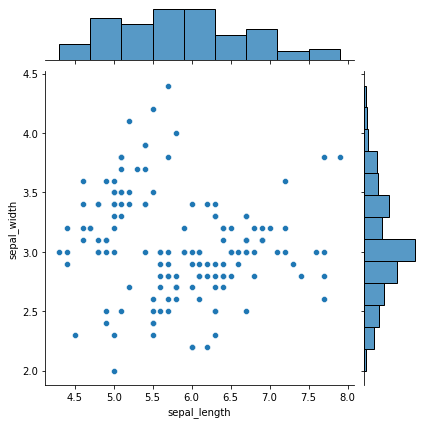

In [55]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df)

It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. 

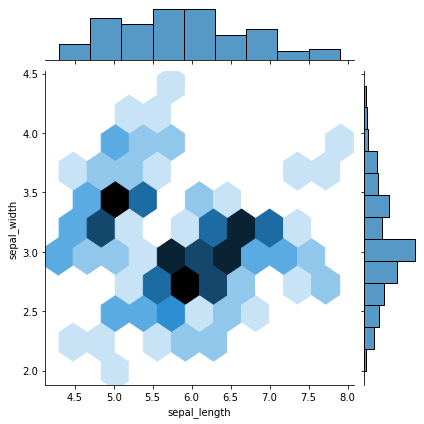

In [56]:
#Enter your code here
sns.jointplot(x='sepal_length',y='sepal_width',data=df,kind="hex")

What stands out to you about the visualization? What is different?

Now, take a look at what happens when you set ```kind="kde"```

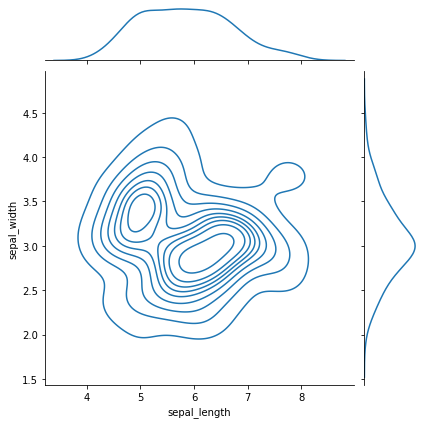

In [57]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,kind="kde")

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


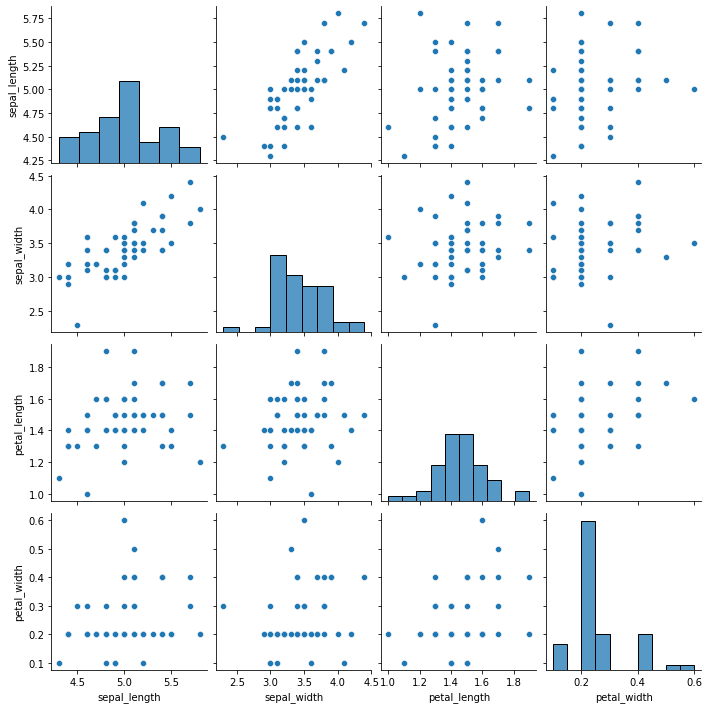

In [58]:
sns.pairplot(df.query("species == 'setosa'"))

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

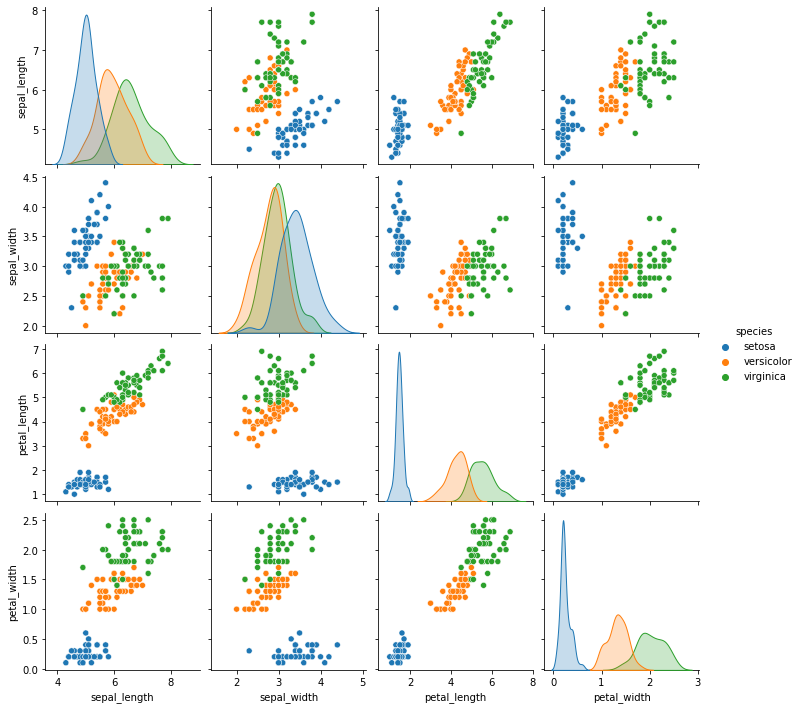

In [59]:
sns.pairplot(df,hue="species")

Now let's introduce some correlations.  We're not going to spend time on learning about the 
theory behind correlation, as you've done that in the statistics prerequisite for this course.
Instead, we're going to jump right in and annotate a graph with a lot of statistical information:

In [60]:
from scipy import stats

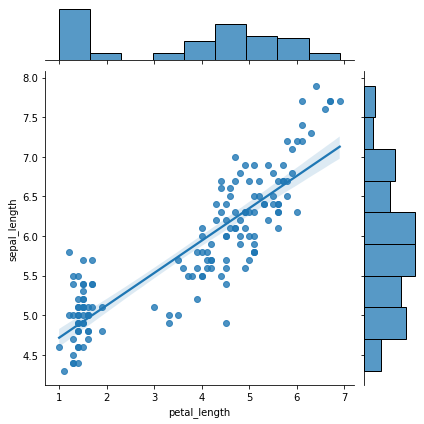

In [61]:
g = sns.JointGrid(data=df,x='petal_length',y='sepal_length')
g = g.plot(sns.regplot, sns.histplot)

# Smoothing

You can see in the plot above plotting can help you see the relationship between two variables. But sometimes the raw data is not easy to read. This is when we need smoothing.

## Telling historical stories through visualizations!

<img src="resources/draftArticle.png" alt="Drawing" style="width: 500px;"/>

## 1970 U.S. Government draft lottery for birthdates
* In an attempt to expose male youth fairly to the risk of being drafted, a lottery was held to allocate birthdates at random.
* Applied to eligible men aged 19 to 26 prior to January 1, 1970, and so included births taking place in some leap years.
* 366 capsules, each containing a unique day of the year, were successively drawn from a container. 
  * The first date drawn (September 14) was assigned rank 1
  * The second date drawn (April 24) was assigned rank 2
  * Those eligible for the draft who were born on 09/14 were called first for physicals, then those born on 04/24 were tapped, and so on.


In [62]:
draft_70 = pd.read_csv("data/draft70.csv")
draft_71 = pd.read_csv("data/draft71.csv")

Lets plot the relatonship between the day of the year and rank for draft year 1970

<AxesSubplot:xlabel='DayofYear', ylabel='Rank'>

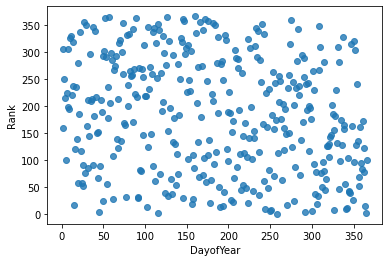

In [63]:
sns.regplot(x='DayofYear',y='Rank',data=draft_70, fit_reg=False)

Hmm looks like there is no relationship. How about 1971?

<AxesSubplot:xlabel='DayofYear', ylabel='Rank'>

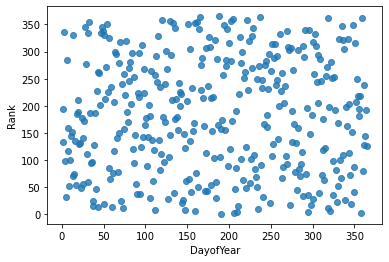

In [64]:
sns.regplot(x='DayofYear',y='Rank',data=draft_71, fit_reg=False)

Was there really no relatinoship?

<AxesSubplot:xlabel='DayofYear', ylabel='Rank'>

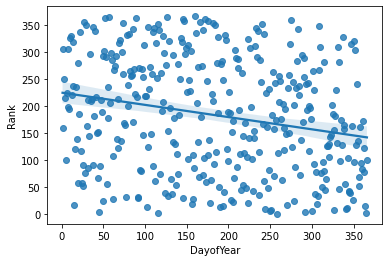

In [65]:
sns.regplot(x='DayofYear',y='Rank',data=draft_70)

We can use other smoothing functions as well. Such as LOWESS

<AxesSubplot:xlabel='DayofYear', ylabel='Rank'>

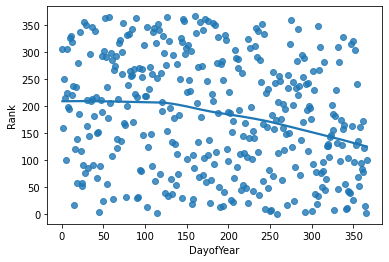

In [70]:
sns.regplot(x='DayofYear',y='Rank',data=draft_70, lowess=True)

## How is lowess fit calculated?
![](resources/lowess.png)

* You can vary the span and degree of local regression. By defaults span =2/3 and degree =1
* You can also set the kernel function. Gaussian by default, fitting is by least-squares

Here, we used smoothing + scatter plot to find this problem. What else could you have done?

# Lab (Not graded)

## 1. Visualization for Data Scientists

We're going to ask a special virtual guest lecturer to provide some background on data visualization.  You'll watch [a brief (8-video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)
and afterwards answer the following questions:



## Discuss the following questions
1. As someone who is studying data science, who are you trying to reach through your visualizations? 
2. Take a look at the different visualizations that are possible with seaborn (https://seaborn.pydata.org/examples/index.html)
3. Discuss the visualizations that you find particularly interesting and explain why you find it interesting. 
4. Provide the title, description, and URL of one of the visualization that the group finds most interesting.
5. Describe 2 axes from Cairo's wheel that your visualization would score highly.
![](resources/CairoVisualWheel.png)

## 2. Practice, Practice, Practice

It is a good idea for you to try out some of the methods we covered in class on different datasets. Check out some simple datasets available through seaborn:

In [ ]:
sns.get_dataset_names()

### <font color="magenta">Q1: Load the car crashes dataset and inspect the columns

### <font color="magenta">Q2: We would like to understand how total accidents vary acrooss the states. Compute mean, standard deviation, and median and visualize the distribution

### <font color="magenta">Q3: What is the relationship between total and speeding? Visualize the relationship.

### <font color="magenta">Q4: What is the relationship between different columns? Use one of the functions we introoduced to plot the relationships and interpret. What do you see? Which columns have a strong relationship and which do not?

### <font color="magenta">Q5: Sample 1K points from a log-normal distribution with mu=0 and sigma=1 and visualize the distribution. Describe the distribution, what do you see? Which of the disitributions we saw earlier in the lecture does it resemble?

### <font color="magenta">Q6: Visualize the same distribution in log-scale. What do you see? Which of the disitributions we saw earlier in the lecture does it resemble?

### <font color="magenta">Q7: Remember the Anscombe dataset we covered earlier? Beloow I am providing the 4 sets of 2 vectors that you can use to 1) compute correlations 2) visualize the four relationships

In [ ]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

To practice more, explore the other datasets...